In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
from pmdarima.arima import auto_arima

In [12]:
data = pd.read_csv('Data/monthly_weather_summary.csv')
data.head(10)

,year,month,latitude,longitude,tp,sf,u10,t2m,tcc
0,2022,12,-10.0,30.00,0.000118,0.0,-2.047057,297.26572,0.302679
1,2022,12,-10.0,30.25,0.000081,0.0,-2.047057,297.26572,0.302679
2,2022,12,-10.0,30.50,0.000056,0.0,-2.047057,297.26572,0.302679
3,2022,12,-10.0,30.75,0.000017,0.0,-2.047057,297.26572,0.302679
4,2022,12,-10.0,31.00,0.000008,0.0,-2.047057,297.26572,0.302679
5,2022,12,-10.0,31.25,0.000075,0.0,-2.047057,297.26572,0.302679
6,2022,12,-10.0,31.50,0.000473,0.0,-2.047057,297.26572,0.302679
7,2022,12,-10.0,31.75,0.002637,0.0,-2.047057,297.26572,0.302679
8,2022,12,-10.0,32.00,0.001152,0.0,-2.047057,297.26572,0.302679
9,2022,12,-10.0,32.25,0.000871,0.0,-2.047057,297.26572,0.302679


In [13]:
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

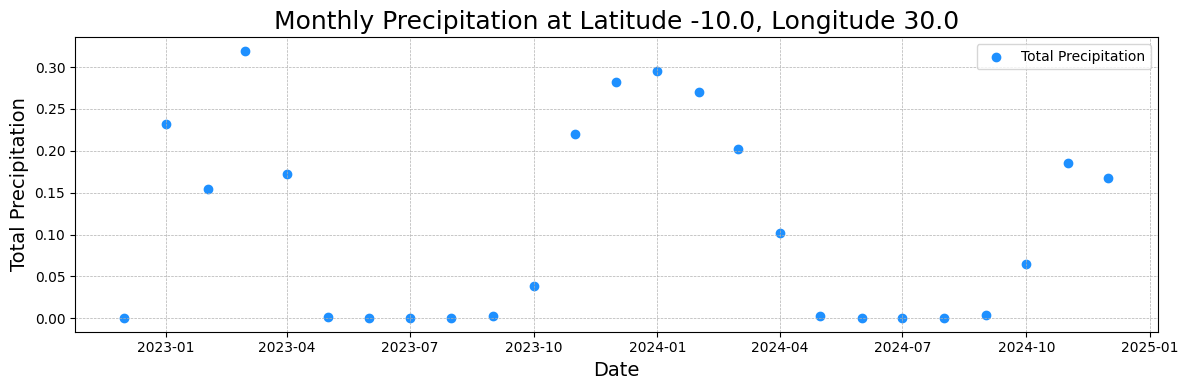

In [14]:
# Filter data for specific latitude and longitude
latitude_value = -10.0  # Replace with the desired latitude
longitude_value = 30.00  # Replace with the desired longitude
filtered_data = data[(data['latitude'] == latitude_value) & (data['longitude'] == longitude_value)]

# Create the Sales Data Plot

# Set up the plot style and size
plt.figure(figsize=(12, 4))

# Plot the Sales Data Scatter Plot
plt.scatter(filtered_data['date'], filtered_data['tp'], color='dodgerblue')

# Set the title and labels
plt.title(f'Monthly Precipitation at Latitude {latitude_value}, Longitude {longitude_value}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['Total Precipitation'])

# Adjust layout and display plots
plt.tight_layout()
plt.show()

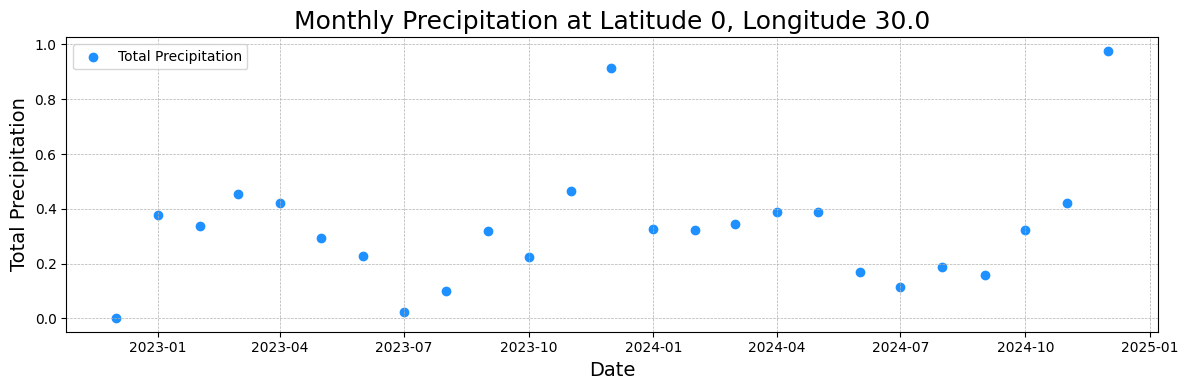

In [15]:
# Filter data for specific latitude and longitude
latitude_value = 0  # Replace with the desired latitude
longitude_value = 30.00  # Replace with the desired longitude
filtered_data = data[(data['latitude'] == latitude_value) & (data['longitude'] == longitude_value)]

# Create the Sales Data Plot

# Set up the plot style and size
plt.figure(figsize=(12, 4))

# Plot the Sales Data Scatter Plot
plt.scatter(filtered_data['date'], filtered_data['tp'], color='dodgerblue')

# Set the title and labels
plt.title(f'Monthly Precipitation at Latitude {latitude_value}, Longitude {longitude_value}', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Precipitation', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(['Total Precipitation'])

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into train and test sets
train_data = data[data['date'] < '2024-01-01']
test_data = data[data['date'] >= '2024-01-01']

# Display the sizes of the train and test sets
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

Training set size: 43173
Test set size: 39852


In [28]:
# Drop rows where 'tp' is NaN
train_data = train_data.dropna(subset=['tp'])

# Group the training data by latitude and longitude and aggregate the 'tp' values into a time series for each location
# percip_series = train_data.groupby(['latitude', 'longitude'])['tp'].apply(list)

# Filter out series that are too short or contain only NaN values
# filtered_percip_series = {
#     (lat, lon): series for (lat, lon), series in percip_series.items()
#     if len(series) > 12 and not all(np.isnan(series))  # Ensure at least 12 data points and not all NaN
# }

# # Impute missing values in each series (e.g., using forward fill or mean imputation)
# for key, series in filtered_percip_series.items():
#     filtered_percip_series[key] = pd.Series(series).fillna(method='ffill').fillna(method='bfill').tolist()


In [29]:
percip_series = train_data['tp']

# Fit the auto_arima model (use 12 for m since we have monthly data and a yearly trend)
arima_model = auto_arima(percip_series, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [ ]:
# Print summary of the model
print(arima_model.summary())

In [ ]:
# Extract the parameters
p, d, q = arima_model.order
P, D, Q, s = arima_model.seasonal_order

print(f"The ARIMA parameters are p = {p}, d = {d}, q = {q}")
print(f"The seasonal ARIMA parameters are P = {P}, D = {D}, Q = {Q}")

In [ ]:
# Find the Training Set MAPE
predicted_values = arima_model.predict_in_sample()
actual_values = percip_series.values

# Calculate the Mean Absolute Percentage Error (MAPE) for training and testing data
def calculate_mape(y_true, y_pred):
    return (100 * abs((y_true - y_pred) / y_true)).mean()

mape_arima = calculate_mape(actual_values, predicted_values)
print(f"The training set MAPE is: {mape_arima:.2f}%")